In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/content/Height_Weight.csv')
df.head()

,Height,Weight
0,90,6
1,95,10
2,99,12
3,110,13
4,115,15


Text(0, 0.5, 'Weight')

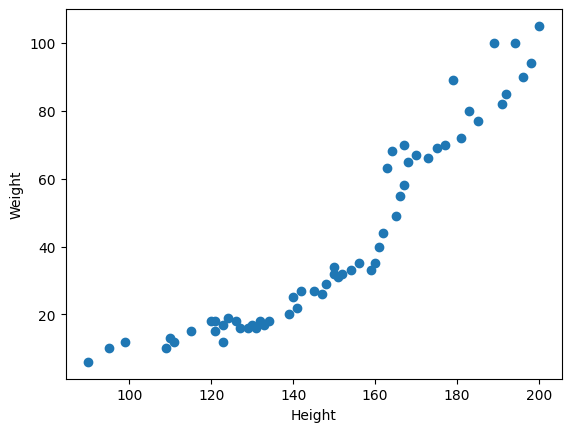

In [3]:
#Scatter plots
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

In [4]:
#Correlataion
df.corr()

,Height,Weight
Height,1.000000,0.935023
Weight,0.935023,1.000000


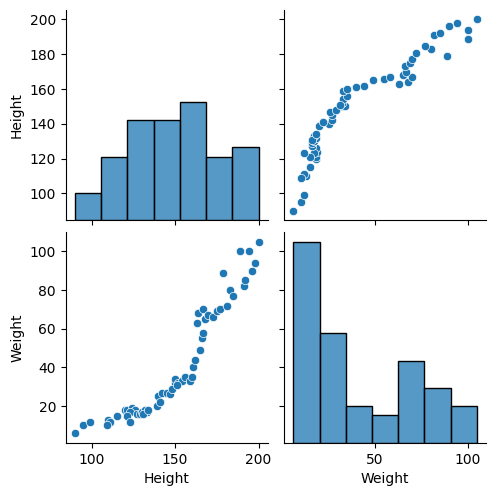

In [5]:
 #Seaborn
import seaborn as sns
sns.pairplot(df)

In [6]:
#Divide independent and dependent features
X= df['Height']
X

,Height
0,90
1,95
2,99
3,110
4,115
5,120
6,121
7,124
8,126
9,123


In [7]:
type(X)

pandas.core.series.Series

In [8]:
#Make sure our independent featurs should be in the form of Dataframe
X=df[['Height']]
X

,Height
0,90
1,95
2,99
3,110
4,115
5,120
6,121
7,124
8,126
9,123


In [9]:
type(X)

pandas.core.frame.DataFrame

In [10]:
#Create dependent Feature and make sure the dependent feature will be in the form of series
Y=df['Weight']
Y.head()

,Weight
0,6
1,10
2,12
3,13
4,15


In [11]:
type(Y)

pandas.core.series.Series

In [12]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=40)
X_train

,Height
0,90
41,163
23,142
2,99
56,194
24,145
11,123
39,166
53,189
35,160


In [13]:
Y_train

,Weight
0,6
41,63
23,27
2,12
56,100
24,27
11,12
39,55
53,100
35,35


In [14]:
X_test

,Height
25,150
49,179
21,139
4,115
26,147
44,168
36,161
59,200
16,130
42,164


In [15]:
Y_test

,Weight
25,32
49,89
21,20
4,15
26,26
44,65
36,40
59,105
16,17
42,68


In [16]:
X_train.shape

(45, 1)

In [17]:
#Standardization - I have two features x and y
# x is calculated based on cm units and y calculated on kg units
#based on this unit the value of the independoint value is higher then it takes more time to reach global minima and its not a ideal one.
# so the optimization takes longer time to reach global minima
#we take the every independent feature and we apply the simple formula called as z score and this convert the values with mean=0 and stddev = 1

from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 0.06153828],
       [ 1.06538146],
       [-0.31922982],
       [-1.1499966 ],
       [-0.04230757],
       [ 0.68461336],
       [ 0.44230638],
       [ 1.79230239],
       [-0.63076736],
       [ 0.54615223],
       [-0.49230624],
       [ 0.64999808],
       [-0.5615368 ],
       [ 0.26922997],
       [ 1.48076485]])

In [22]:
#Apply simple linear regression
from sklearn.linear_model import LinearRegression


In [23]:
regression = LinearRegression()

In [24]:
regression.fit(X_train,Y_train)

LinearRegression()

In [25]:
#slope or coeeficient
regression.coef_

#one movement of x value and the 26 movement of y value.

array([26.40402445])

In [26]:
#Intercept
regression.intercept_

40.26666666666667

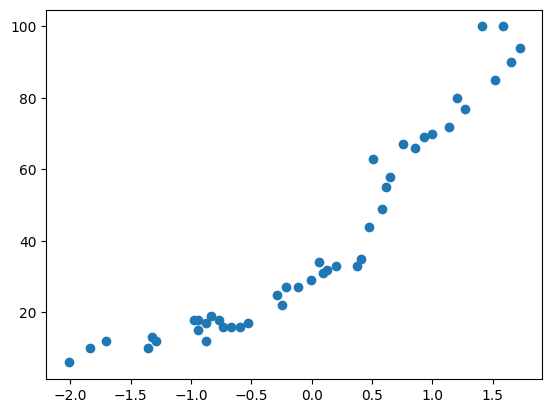

In [28]:
#Plot the training data with best fit line
plt.scatter(X_train,Y_train)

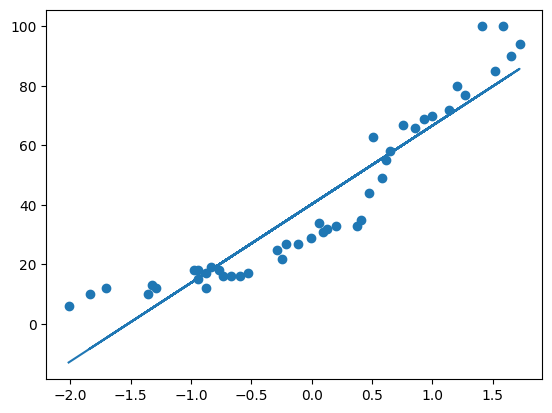

In [29]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

In [33]:
#Prediction using test data
#y_pred = 40.2666 + 26.404(X_test)

Y_pred = regression.predict(X_test)
Y_pred

array([41.8915249 , 68.39702487, 31.83771457,  9.90212839, 39.14957663,
       58.34321454, 51.94533523, 87.59066278, 23.61186975, 54.68728351,
       27.26780078, 57.42923178, 25.43983527, 47.37542145, 79.36481796])

In [32]:
#Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [34]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

135.45018807735835
10.720314317666755
11.638306924864903


In [35]:
#Rsquare
from sklearn.metrics import r2_score

In [37]:
score = r2_score(Y_test,Y_pred)
print(score)

0.8417555827540079


In [38]:
#Adjusted Rsquare
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.8295829352735469

In [44]:
#Prediction for new data
regression.predict([[67]])

array([1809.33630454])

In [51]:
#we need to do the standardization
regression.predict(scaler.transform([[167]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([57.42923178])